A NEW TITANIC DATA SET USED HERE
* MODELS ARE BaggingClassifier,
  DecisionTreeClassifier,
  RandomForestClassifier,
  ExtraTreesClassifier,
  AdaBoostClassifier,
  LogisticRegression,
  roc_curve,auc

In [1]:
import pandas as pd


In [2]:
titanic=pd.read_csv('/home/anu/Downloads/Boosting dataset/titanic(2).csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic=titanic.dropna()
titanic=titanic.drop(['Ticket','Cabin'],axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S


In [4]:
titanic=pd.concat([titanic,pd.get_dummies(titanic['Sex'])],axis=1)
titanic=pd.concat([titanic,pd.get_dummies(titanic['Embarked'])],axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,1,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,1,0,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,52.5542,S,1,0,0,0,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,S,0,1,0,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C,1,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,0,0,0,1


In [5]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x=titanic[['Pclass','Age','female','SibSp','Parch','Fare','C','Q','S']]
y=titanic['Survived']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2,random_state=29)
xtrain.head()

,Pclass,Age,female,SibSp,Parch,Fare,C,Q,S
751,3,6.0,0,0,1,12.4750,0,0,1
3,1,35.0,1,1,0,53.1000,0,0,1
515,1,47.0,0,0,0,34.0208,0,0,1
332,1,38.0,0,0,1,153.4625,0,0,1
275,1,63.0,1,1,0,77.9583,0,0,1


Decision Tree Fitting


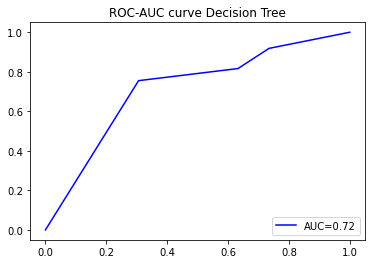

Logistic reg Fitting


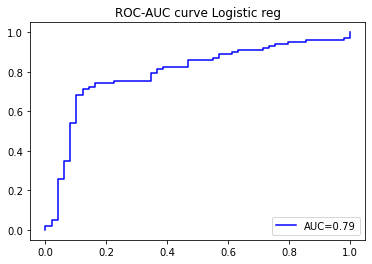

Random forest Fitting


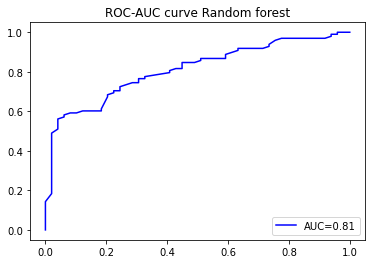

Bagging classifier Fitting


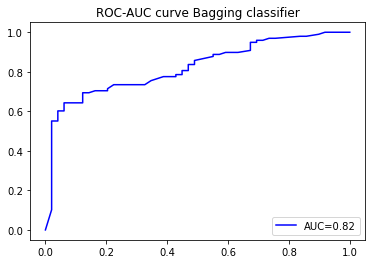

Extra trees Fitting


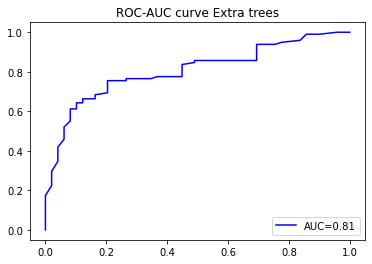

Adaboost Fitting


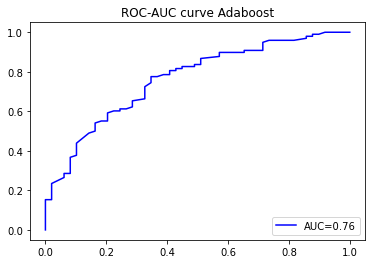

model scores
Decision Treewith scores0.735
Logistic regwith scores0.735
Random forestwith scores0.735
Bagging classifierwith scores0.721
Extra treeswith scores0.728
Adaboostwith scores0.728


In [9]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
 
n_estimators=100

models=[DecisionTreeClassifier(max_depth=3),\
       LogisticRegression(),\
       RandomForestClassifier(n_estimators=n_estimators),\
       BaggingClassifier(n_estimators=n_estimators),\
       ExtraTreesClassifier(n_estimators=n_estimators),\
       AdaBoostClassifier(n_estimators=n_estimators)]

model_title=['Decision Tree','Logistic reg','Random forest',
             'Bagging classifier','Extra trees','Adaboost']

surv_pred,surv_prob,scores,fprs,tprs,thres=([] for i in range(len(model_title)))

for i,model in enumerate(models):
    print(f'{model_title[i]} Fitting')
    clf=model.fit(xtrain,ytrain)
    surv_pred.append(model.predict(xtest))
    surv_prob.append(model.predict_proba(xtest))
    scores.append(model.score(xtest,ytest))
    
    fpr,tpr,thresholds=roc_curve(ytest,surv_prob[i][:,1])
    fprs.append(fpr)
    tprs.append(tpr)
    thres.append(thresholds)
    
    plt.title(f'ROC-AUC curve {model_title[i]}')
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.show()

print('model scores')
for i,score in enumerate(scores):
    print(f'{model_title[i]}with scores{score:0.3f}')

In [ ]:
import sklearn

In [ ]:
sklearn.__version__